 # Project (Affordable Housing to Pantries)
 #### This python notebook contains the basic analysis of how the Affordable Housing is situated withing Food Pantries
##### AIM:: To correlate how affordable housing is located to proximate near the food pantries and meal programs
##### Authors: Divya Prakash Manivannan , Rachael Lim


## Imports

In [54]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import folium
import requests, json
from geopy.geocoders import Nominatim

## Requests

In [55]:
## Housing unit response
URL = 'https://data.lacity.org/resource/mymu-zi3s.json'
house_response = requests.get(URL).json()

In [56]:
## Food Oasis Wiki retrieval
URL = 'https://la.foodoasis.net/api/stakeholderbests/select-all?tenantId=1'
response = requests.get(URL).json()

In [57]:
df = pd.DataFrame.from_dict(response)

In [58]:
df_housing = pd.DataFrame.from_dict(house_response)

In [59]:
df.columns

Index(['id', 'name', 'address1', 'address2', 'city', 'state', 'zip', 'phone',
       'latitude', 'longitude', 'website', 'notes', 'createdDate',
       'modifiedDate', 'approvedDate', 'requirements', 'inactive',
       'parentOrganization', 'physicalAccess', 'email', 'items', 'services',
       'facebook', 'twitter', 'pinterest', 'linkedin', 'description',
       'reviewNotes', 'instagram', 'adminContactName', 'adminContactPhone',
       'adminContactEmail', 'covidNotes', 'foodTypes', 'languages',
       'verificationStatusId', 'inactiveTemporary', 'hours', 'categoryIds',
       'neighborhoodId', 'neighborhoodName', 'isVerified',
       'parentOrganizationId', 'allowWalkins', 'hoursNotes', 'tags',
       'categories'],
      dtype='object')

In [60]:
df.to_csv('pantries.csv',',')

In [61]:
df.shape

(853, 47)

In [62]:
df = df.convert_dtypes()

## Cleaning of Housing Data

In [63]:
housing = pd.read_csv("LAHD_Affordable_Housing_Projects_List__2003_to_Present__20240212.csv")
housing.drop(['CONTACT PHONE', 'PHOTO', 'JOBS', 'PROJECT SUMMARY URL', 
             'CONTRACT NUMBERS', 'DATE FUNDED', 'LAHD FUNDED', 
             'TDC', 'TAX EXEMPT CONDUIT BOND', 'IN-SERVICE DATE', 
             'DEVELOPER', 'SITE UNITS', 'PROJECT TOTAL UNITS', 
             'LEVERAGE', 'MANAGEMENT COMPANY'], axis = 1, inplace = True)
housing = housing.dropna(subset=['CONSTRUCTION TYPE', 'SITE COMMUNITY'])

In [64]:
import folium

# Create a base map
map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)  # Los Angeles coordinates

# Loop through the data and add each point to the map
for index, row in housing.iterrows():
    folium.Marker([row['SITE LATITUDE'], row['SITE LONGITUDE']], 
                  popup=row['NAME']).add_to(map)

# Display the map
map

<Axes: >

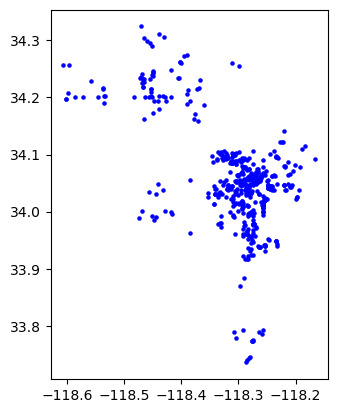

In [65]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(housing['SITE LONGITUDE'], housing['SITE LATITUDE'])]
geo_df = gpd.GeoDataFrame(housing, geometry=geometry)

# Plotting
geo_df.plot(marker='o', color='b', markersize=5)

## Cleaning of Pantries Data

In [66]:
df.dtypes

id                        Int64
name                     string
address1                 string
address2                 string
city                     string
state                    string
zip                      string
phone                    string
latitude                 string
longitude                string
website                  string
notes                    string
createdDate              string
modifiedDate             string
approvedDate             string
requirements             string
inactive                boolean
parentOrganization       string
physicalAccess           string
email                    string
items                    string
services                 string
facebook                 string
twitter                  string
pinterest                string
linkedin                 string
description              string
reviewNotes              string
instagram                string
adminContactName         string
adminContactPhone        string
adminCon

In [67]:
pd.set_option('display.max_colwidth', None)

In [68]:
df[:2]

,id,name,address1,address2,city,state,zip,phone,latitude,longitude,...,hours,categoryIds,neighborhoodId,neighborhoodName,isVerified,parentOrganizationId,allowWalkins,hoursNotes,tags,categories
0,3159,St. Thomas the Apostle Catholic Church - Pico Blvd.,2727 W. Pico Boulevard,,Los Angeles,CA,90006,(323) 737-3325,34.0244139091765,-118.460970086499,...,"[{'week_of_month': 2, 'day_of_week': 'Sat', 'open': '06:00:00', 'close': '07:30:00'}, {'week_of_month': 3, 'day_of_week': 'Sat', 'open': '06:00:00', 'close': '07:30:00'}]","[1, 8]",<NA>,<NA>,True,None,False,,None,"[{'id': 1, 'name': 'Food Pantry', 'displayOrder': 10}, {'id': 8, 'name': 'Food Bank', 'displayOrder': 18}]"
1,3149,St. Lawrence of Brindisi,10122 Compton Avenue,,Los Angeles,CA,90002,(323) 567-1439,33.9446176,-118.2460508,...,"[{'week_of_month': 0, 'day_of_week': 'Mon', 'open': '08:00:00', 'close': '11:00:00'}, {'week_of_month': 0, 'day_of_week': 'Tue', 'open': '08:00:00', 'close': '11:00:00'}, {'week_of_month': 0, 'day_of_week': 'Wed', 'open': '20:00:50', 'close': '11:00:50'}, {'week_of_month': 0, 'day_of_week': 'Thu', 'open': '08:00:50', 'close': '11:00:50'}, {'week_of_month': 0, 'day_of_week': 'Fri', 'open': '08:00:50', 'close': '11:00:50'}, {'week_of_month': 0, 'day_of_week': 'Sat', 'open': '08:00:18', 'close': '11:00:18'}, {'week_of_month': 0, 'day_of_week': 'Sun', 'open': '08:00:20', 'close': '11:00:20'}]",[1],38,WATTS NC,True,None,True,,None,"[{'id': 1, 'name': 'Food Pantry', 'displayOrder': 10}]"


In [69]:
df[:1]['categories']

0    [{'id': 1, 'name': 'Food Pantry', 'displayOrder': 10}, {'id': 8, 'name': 'Food Bank', 'displayOrder': 18}]
Name: categories, dtype: object

In [70]:
df['state'].unique()

<StringArray>
['CA', 'California', 'TX', 'FL', 'CA ', 'OR', 'Texas', 'HI']
Length: 8, dtype: string

In [71]:
df.isna().sum()

id                        0
name                      0
address1                  0
address2                  0
city                      0
state                     0
zip                       0
phone                     0
latitude                  1
longitude                 2
website                   0
notes                     0
createdDate               0
modifiedDate              2
approvedDate             52
requirements              0
inactive                  0
parentOrganization        0
physicalAccess            0
email                     0
items                     0
services                  0
facebook                  0
twitter                   0
pinterest                 0
linkedin                  0
description               0
reviewNotes               0
instagram                 0
adminContactName          0
adminContactPhone         0
adminContactEmail         0
covidNotes                0
foodTypes                 0
languages                 0
verificationStatusId

In [72]:
## List of unwanted columns

columns_list = ['neighborhoodId','neighborhoodName','parentOrganizationId','tags','approvedDate','linkedin','pinterest','twitter','facebook','instagram','categories']

df_clean = df.drop(columns=columns_list,axis=1)
    

In [73]:
df_clean.dtypes

id                        Int64
name                     string
address1                 string
address2                 string
city                     string
state                    string
zip                      string
phone                    string
latitude                 string
longitude                string
website                  string
notes                    string
createdDate              string
modifiedDate             string
requirements             string
inactive                boolean
parentOrganization       string
physicalAccess           string
email                    string
items                    string
services                 string
description              string
reviewNotes              string
adminContactName         string
adminContactPhone        string
adminContactEmail        string
covidNotes               string
foodTypes                string
languages                string
verificationStatusId      Int64
inactiveTemporary       boolean
hours   

In [74]:
df_clean.columns

Index(['id', 'name', 'address1', 'address2', 'city', 'state', 'zip', 'phone',
       'latitude', 'longitude', 'website', 'notes', 'createdDate',
       'modifiedDate', 'requirements', 'inactive', 'parentOrganization',
       'physicalAccess', 'email', 'items', 'services', 'description',
       'reviewNotes', 'adminContactName', 'adminContactPhone',
       'adminContactEmail', 'covidNotes', 'foodTypes', 'languages',
       'verificationStatusId', 'inactiveTemporary', 'hours', 'categoryIds',
       'isVerified', 'allowWalkins', 'hoursNotes'],
      dtype='object')

In [75]:
print(df_clean['longitude'].isna().sum())
print(df_clean['latitude'].isna().sum())

2
1


In [76]:
df_clean.isna().sum()

id                      0
name                    0
address1                0
address2                0
city                    0
state                   0
zip                     0
phone                   0
latitude                1
longitude               2
website                 0
notes                   0
createdDate             0
modifiedDate            2
requirements            0
inactive                0
parentOrganization      0
physicalAccess          0
email                   0
items                   0
services                0
description             0
reviewNotes             0
adminContactName        0
adminContactPhone       0
adminContactEmail       0
covidNotes              0
foodTypes               0
languages               0
verificationStatusId    0
inactiveTemporary       0
hours                   1
categoryIds             0
isVerified              0
allowWalkins            0
hoursNotes              0
dtype: int64

In [77]:
# # Function to geocode address and return latitude and longitude
# geolocator = Nominatim(user_agent="MyUniqueGeoApp")

# def geocode_address(address):
#     try:
#         location = geolocator.geocode(address)
#         if location:
#             print("11")
#             return location.latitude, location.longitude
#         else:
#             print('22')
#             return None, None
#     except Exception as e:
#         print(e)
#         return None, None
    
# for i,val in df_clean.iterrows():
#     if val['longitude'] is None or val['latitude'] is None:
#          print(geocode_address(val['address1']))
#          val['latitude'], val['longitude'] = geocode_address(val['address1'])



In [78]:
df_clean = df_clean.dropna()

In [79]:
df_clean.isna().sum()

id                      0
name                    0
address1                0
address2                0
city                    0
state                   0
zip                     0
phone                   0
latitude                0
longitude               0
website                 0
notes                   0
createdDate             0
modifiedDate            0
requirements            0
inactive                0
parentOrganization      0
physicalAccess          0
email                   0
items                   0
services                0
description             0
reviewNotes             0
adminContactName        0
adminContactPhone       0
adminContactEmail       0
covidNotes              0
foodTypes               0
languages               0
verificationStatusId    0
inactiveTemporary       0
hours                   0
categoryIds             0
isVerified              0
allowWalkins            0
hoursNotes              0
dtype: int64

In [80]:
df_clean.shape

(848, 36)

In [81]:
df_clean['city'].unique

<bound method Series.unique of 0        Los Angeles
1        Los Angeles
2          Inglewood
3      Redondo Beach
4       Rohnert Park
           ...      
848       Santa Rosa
849           Sonoma
850       Sebastopol
851       Cloverdale
852         Petaluma
Name: city, Length: 848, dtype: string>

In [82]:
df_clean['state'].replace('Texas', 'TX', inplace=True)
df_clean['state'].replace('California', 'CA', inplace=True)

In [83]:
df_clean['state'].unique()

<StringArray>
['CA', 'TX', 'FL', 'CA ', 'OR', 'HI']
Length: 6, dtype: string

In [84]:
df_texas = df_clean[df_clean['state'] == 'TX']
df_california = df_clean[df_clean['state'] == 'CA']
df_oreagon = df_clean[df_clean['state'] == 'OR']
df_hawai = df_clean[df_clean['state'] == 'HI']

In [85]:
df_california.reset_index(inplace=True,drop=True)

### California Exploration

In [86]:
df_california.shape

(792, 36)

In [87]:
df_california.dtypes

id                        Int64
name                     string
address1                 string
address2                 string
city                     string
state                    string
zip                      string
phone                    string
latitude                 string
longitude                string
website                  string
notes                    string
createdDate              string
modifiedDate             string
requirements             string
inactive                boolean
parentOrganization       string
physicalAccess           string
email                    string
items                    string
services                 string
description              string
reviewNotes              string
adminContactName         string
adminContactPhone        string
adminContactEmail        string
covidNotes               string
foodTypes                string
languages                string
verificationStatusId      Int64
inactiveTemporary       boolean
hours   

In [88]:
df_california['city'].nunique

<bound method IndexOpsMixin.nunique of 0        Los Angeles
1        Los Angeles
2          Inglewood
3      Redondo Beach
4       Rohnert Park
           ...      
787       Santa Rosa
788           Sonoma
789       Sebastopol
790       Cloverdale
791         Petaluma
Name: city, Length: 792, dtype: string>

In [89]:
df_california_active = df_california[df_california['inactive'] == False]
df_california_active.reset_index(inplace=True,drop=True)
print(len(df_california_active))

747


## Analysis

In [90]:
df_california.columns

Index(['id', 'name', 'address1', 'address2', 'city', 'state', 'zip', 'phone',
       'latitude', 'longitude', 'website', 'notes', 'createdDate',
       'modifiedDate', 'requirements', 'inactive', 'parentOrganization',
       'physicalAccess', 'email', 'items', 'services', 'description',
       'reviewNotes', 'adminContactName', 'adminContactPhone',
       'adminContactEmail', 'covidNotes', 'foodTypes', 'languages',
       'verificationStatusId', 'inactiveTemporary', 'hours', 'categoryIds',
       'isVerified', 'allowWalkins', 'hoursNotes'],
      dtype='object')

In [91]:
df_california_active[744:745]

,id,name,address1,address2,city,state,zip,phone,latitude,longitude,...,covidNotes,foodTypes,languages,verificationStatusId,inactiveTemporary,hours,categoryIds,isVerified,allowWalkins,hoursNotes
744,5457,Burbank Heights and Orchards,7777 Bodega Ave,,Sebastopol,CA,95472,(707) 823-1361,38.397080986014146,-122.83440596556031,...,,,English,4,False,"[{'week_of_month': 0, 'day_of_week': 'Mon', 'open': '09:00:00', 'close': '16:00:00'}, {'week_of_month': 0, 'day_of_week': 'Tue', 'open': '09:00:00', 'close': '16:00:00'}, {'week_of_month': 0, 'day_of_week': 'Wed', 'open': '09:00:00', 'close': '16:00:00'}, {'week_of_month': 0, 'day_of_week': 'Thu', 'open': '09:00:00', 'close': '16:00:00'}, {'week_of_month': 0, 'day_of_week': 'Fri', 'open': '09:00:00', 'close': '16:00:00'}]","[7, 1]",True,False,


In [92]:

# df_california_active = df_california[df_california['inactive'] == False]
print(df_california_active.shape)
print(housing.shape)


(747, 36)
(532, 16)


### Distance Analysis of Nearest Pantries from each Affordable Housing Unit

In [93]:
housing_gdf = gpd.GeoDataFrame(
    housing, 
    geometry=[Point(xy) for xy in zip(housing['SITE LONGITUDE'], housing['SITE LATITUDE'])]
)

# Convert pantry DataFrame to a GeoDataFrame
pantry_gdf = gpd.GeoDataFrame(
    df_california_active, 
    geometry=[Point(xy) for xy in zip(df_california_active['longitude'], df_california_active['latitude'])]
)

In [94]:
print(housing_gdf.shape)
print(pantry_gdf.shape)

(532, 17)
(747, 37)


In [95]:
# Function to find the nearest pantry and calculate distance
def find_nearest_and_distance(housing_point, pantries):

    distances = pantries.distance(housing_point)
    nearest_idx = distances.idxmin()
    nearest_distance = distances[nearest_idx]
    return nearest_idx, nearest_distance


housing_gdf['nearest_pantry'], housing_gdf['distance_to_nearest_pantry'] = zip(*housing_gdf.apply(lambda x: find_nearest_and_distance(x.geometry, pantry_gdf.geometry), axis=1))

In [96]:
# Print or analyze the results
print(housing_gdf[['NAME', 'nearest_pantry', 'distance_to_nearest_pantry']])

                            NAME  nearest_pantry  distance_to_nearest_pantry
0           SAN LUCAS APARTMENTS              85                    0.005661
1                WILSHIRE TOWERS             138                    0.003362
2              POINTE ON LA BREA             168                    0.008992
3         LEEWARD APTS. (SITE 7)              90                    0.010746
4        FLORENCE MILLS (SITE 5)             606                    0.002296
..                           ...             ...                         ...
565       MAIN STREET APARTMENTS             339                    0.003279
566  GRAND AVENUE PARCEL Q APTS.             694                    0.003093
567      FLORENCE MILLS (SITE 4)             606                    0.001848
568      LAS MARGARITAS (SITE 2)             169                    0.005551
569                  UNION POINT             321                    0.006994

[532 rows x 3 columns]


In [97]:
# Assuming housing_gdf and pantry_gdf are your GeoDataFrames with the required data

# Create a map centered around an average location
map_center = [housing_gdf['SITE LATITUDE'].mean(), housing_gdf['SITE LONGITUDE'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=12)

# Add housing projects to the map
for idx, row in housing_gdf.iterrows():
    folium.Marker(
        location=[row['SITE LATITUDE'], row['SITE LONGITUDE']],
        popup=row['NAME'],
        icon=folium.Icon(color='red', icon='home')
    ).add_to(folium_map)

# Add pantries to the map
for idx, row in pantry_gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='cutlery')
    ).add_to(folium_map)

# # Draw colored lines based on distance
for idx, row in housing_gdf.iterrows():
    nearest_pantry_idx = row['nearest_pantry']
    pantry_point = pantry_gdf.iloc[nearest_pantry_idx]
    # Calculate the distance using Geopandas
    distance = row.geometry.distance(pantry_point.geometry) * 100  # Assuming the CRS is in degrees, converting to kilometers

    # Convert distance to miles
    distance_miles = distance * 0.621371

    # Set line color based on distance 
    if distance_miles < 2:
        line_color = 'green'
    elif 2 <= distance_miles < 5:
        line_color = 'orange'
    else:
        line_color = 'red'

    line = folium.PolyLine(
        locations=[
            [row['SITE LATITUDE'], row['SITE LONGITUDE']],
            [pantry_point['latitude'], pantry_point['longitude']]
        ],
        weight=2,
        color=line_color
    ).add_to(folium_map)

# Display the map
folium_map


In [98]:
from matplotlib import pyplot as plt

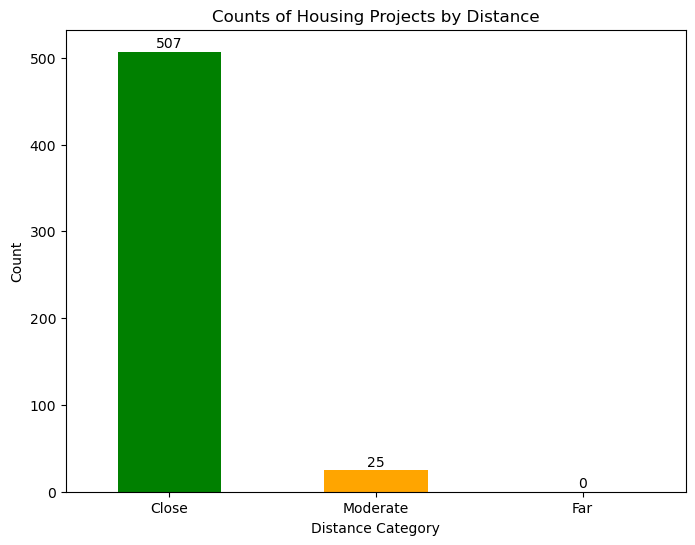

In [99]:
close_threshold = 1
moderate_threshold = 5

housing_gdf['Distance (miles)'] = housing_gdf.apply(lambda row: row.geometry.distance(pantry_gdf.iloc[row['nearest_pantry']].geometry) * 100 * 0.621371, axis=1)
housing_gdf['Distance Category'] = pd.cut(housing_gdf['Distance (miles)'], bins=[-float('inf'), close_threshold, moderate_threshold, float('inf')], labels=['Close', 'Moderate', 'Far'])

# Count housing projects in each distance category
distance_counts = housing_gdf['Distance Category'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
distance_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Counts of Housing Projects by Distance')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display counts above the bars
for i, count in enumerate(distance_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

### Analysis of Housing Units to Pantries

In [100]:
pantry_link_count = housing_gdf['nearest_pantry'].value_counts()

# Convert pantry_link_count to a DataFrame
pantry_link_count_df = pantry_link_count.reset_index()
pantry_link_count_df.columns = ['Pantry Index', 'Linked Housing Units']

# Merge with pantry_gdf to get pantry names
pantry_link_count_df = pantry_link_count_df.merge(pantry_gdf, left_on='Pantry Index', right_index=True)

# Sort the pantries based on the count
sorted_pantries = pantry_link_count_df.sort_values(by='Linked Housing Units', ascending=False)

# Output the sorted list
sorted_pantries[['name', 'Linked Housing Units', 'city']]

,name,Linked Housing Units,city
0,Mac Arthur Park Tower,14,Los Angeles
2,First Southern Baptist Church of Hollywood,13,Hollywood
1,Bresee Youth Center,13,Los Angeles
3,First Presbyterian Church of Los Angeles,12,Los Angeles
4,Catholic Charities - Los Angeles,11,Los Angeles
...,...,...,...
132,Fred Jordan Missions,1,Los Angeles
133,Salvation Army - LA Central,1,Los Angeles
134,White Memorial S.D.A. Church,1,Los Angeles
135,Hurting & Hungry,1,Los Angeles


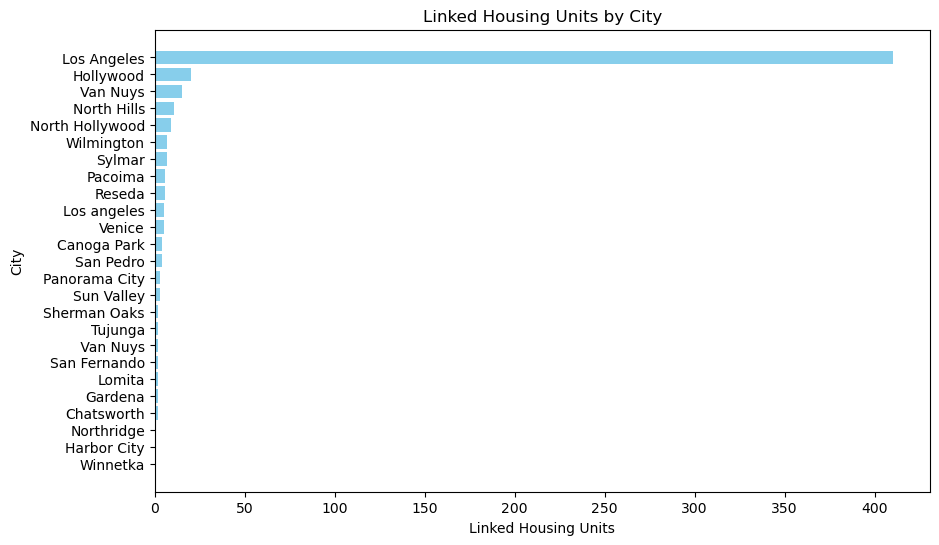

In [101]:
grouped_data = sorted_pantries.groupby('city')['Linked Housing Units'].sum().reset_index()
sorted_grouped_data = grouped_data.sort_values(by = 'Linked Housing Units', ascending = False)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(sorted_grouped_data['city'], sorted_grouped_data['Linked Housing Units'], color='skyblue')
plt.xlabel('Linked Housing Units')
plt.ylabel('City')
plt.title('Linked Housing Units by City')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

### Analysis of Not Linked Pantries

In [102]:
linked_pantry_names = set(sorted_pantries['name'])

unlinked_pantries = pantry_gdf[~pantry_gdf['name'].isin(linked_pantry_names)]

unlinked_pantries = unlinked_pantries[['name', 'city']]
unlinked_pantries

,name,city
2,Inglewood Church of Christ,Inglewood
3,St. Paul's Methodist Church - Project: NEEDS,Redondo Beach
4,Tower Apts.,Rohnert Park
5,Dwelling Place Anaheim,Anaheim
7,Justice for Murdered Children,San Pedro
...,...,...
742,Santa Rosa Veterans Memorial Building,Santa Rosa
743,FISH of Sonoma,Sonoma
744,Burbank Heights and Orchards,Sebastopol
745,Cloverdale Senior Multi Purpose Center,Cloverdale


            city  Number of Pantries
105  Los Angeles                  72
103   Long Beach                  31
130       Pomona                  21
29    Santa Rosa                  16
99     Lancaster                  15
..           ...                 ...
69      Etiwanda                   1
68     Escondido                   1
67        Encino                   1
61   Culver City                   1
181    la verne                    1

[182 rows x 2 columns]


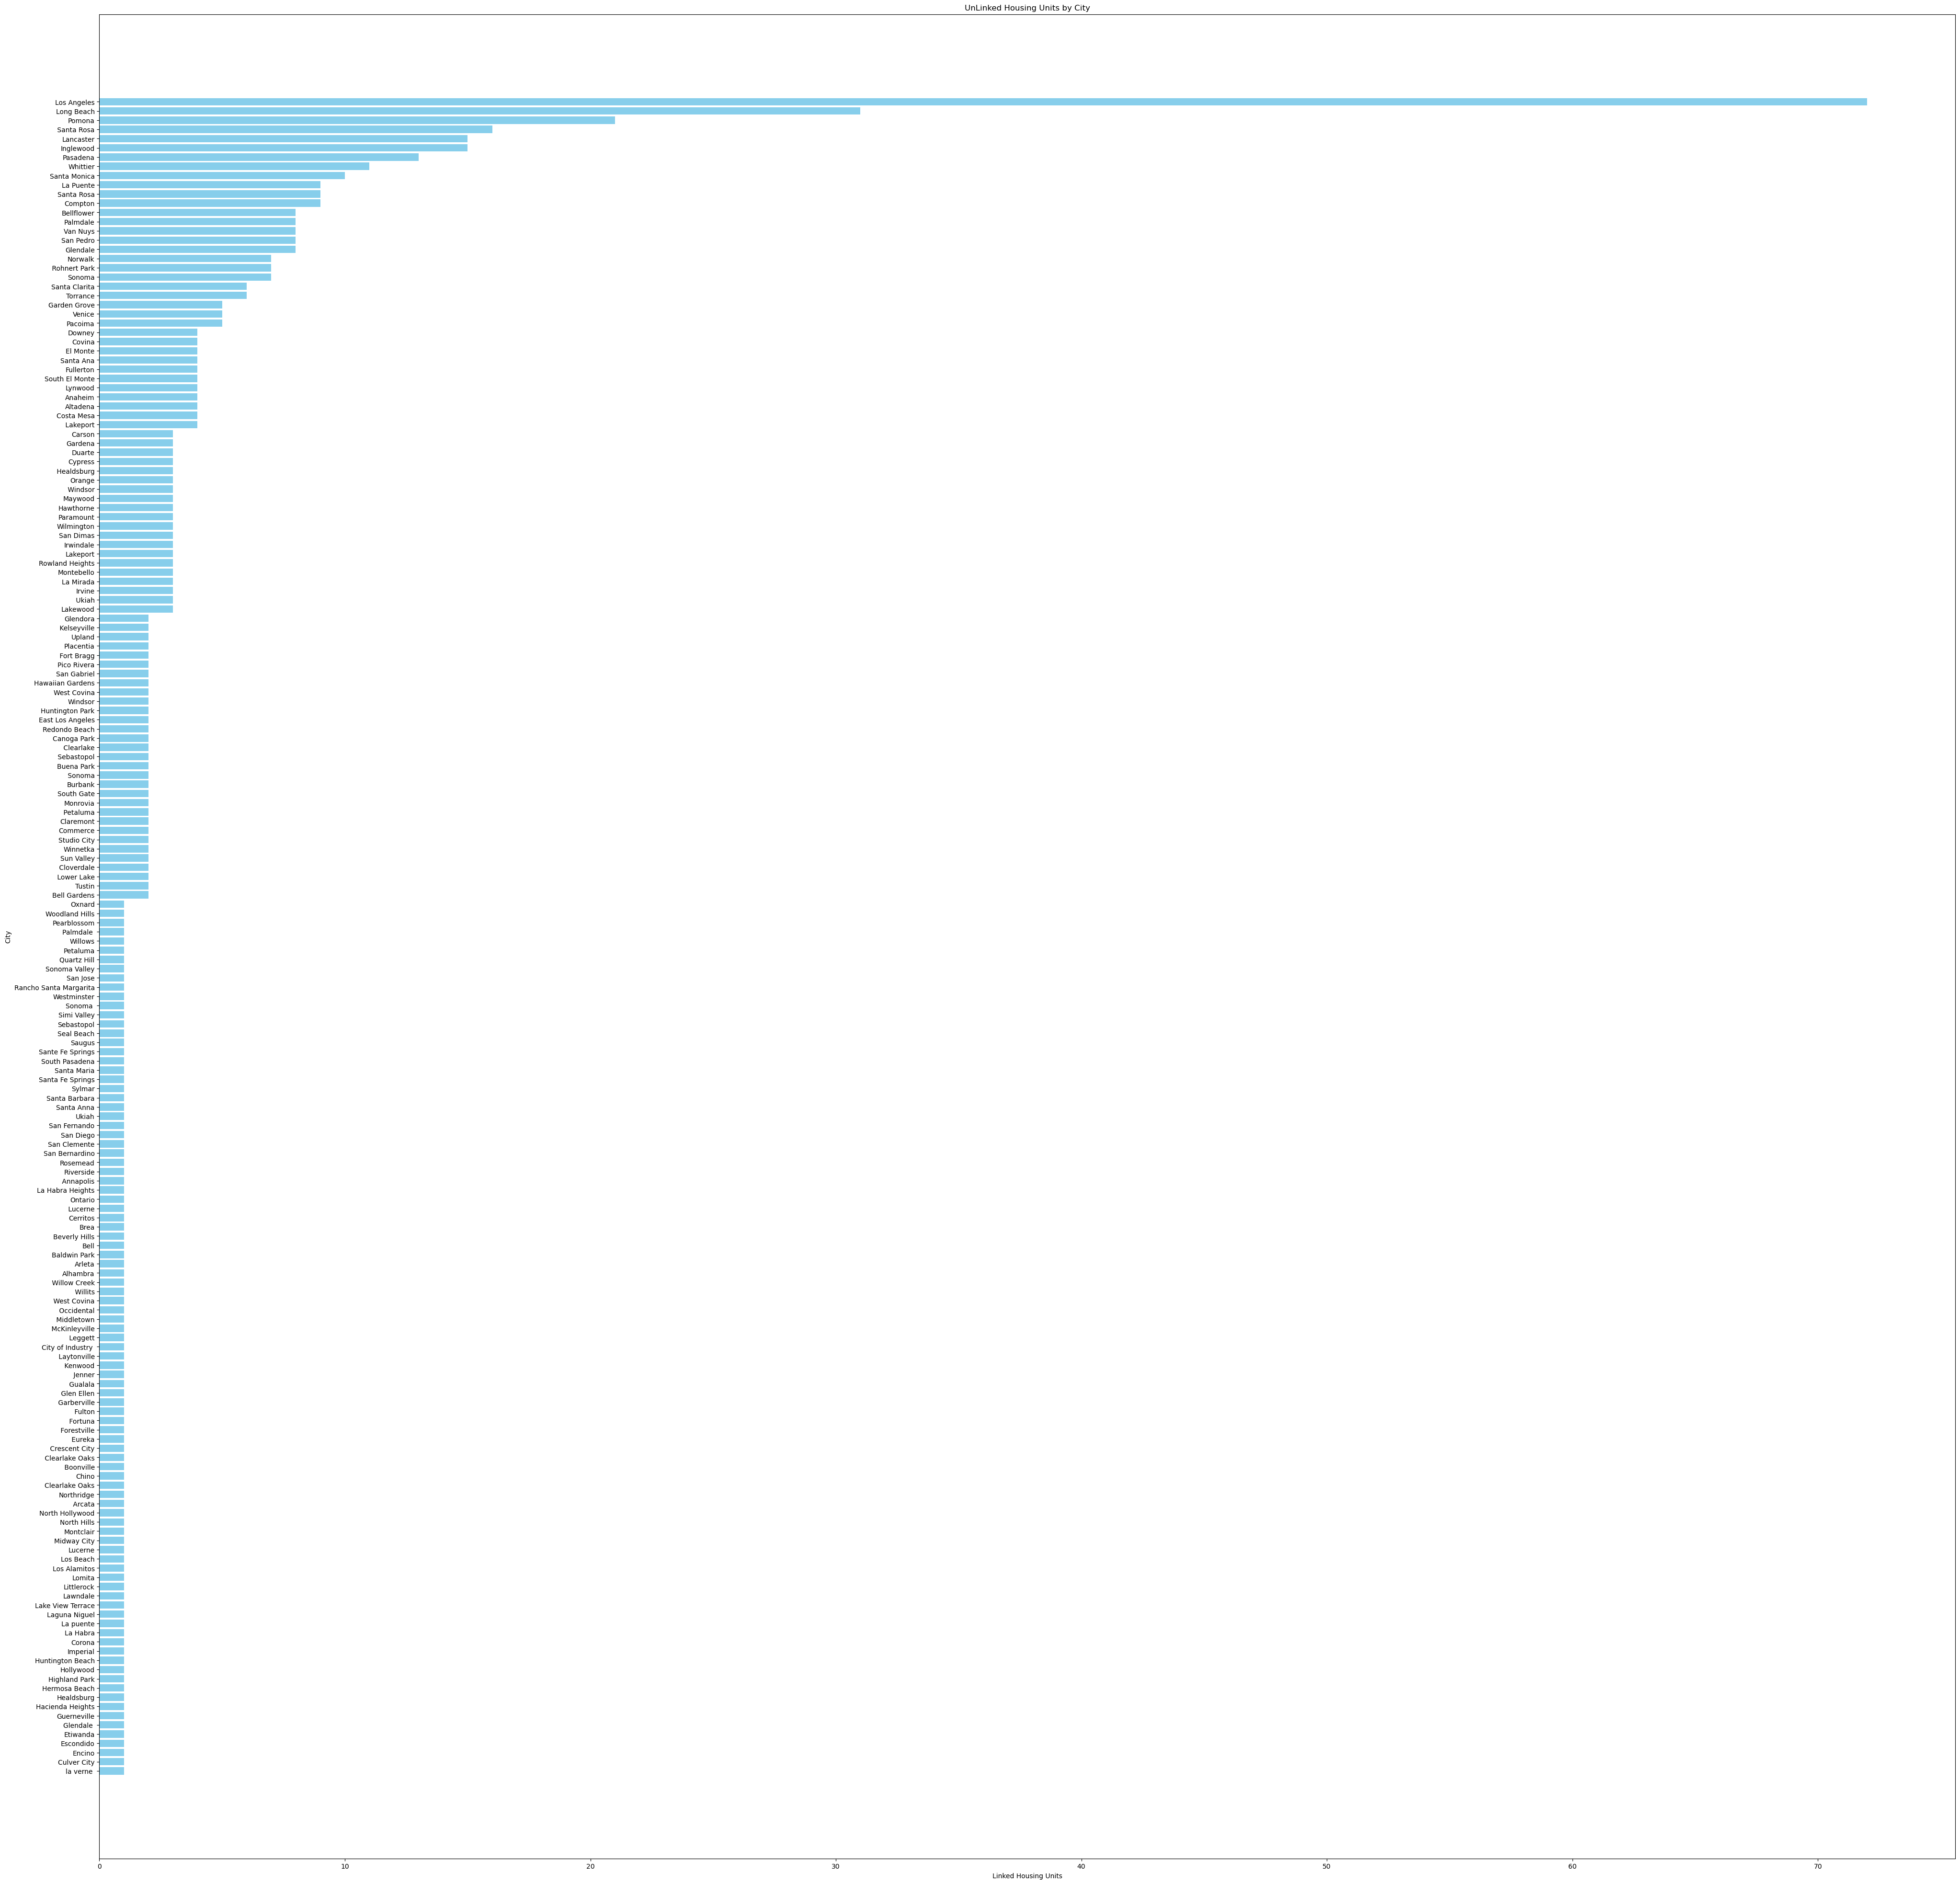

In [103]:
grouped_pantries = unlinked_pantries.groupby('city')['name'].count().reset_index()
grouped_pantries.columns = ['city', 'Number of Pantries']
sorted_grouped_pantries = grouped_pantries.sort_values(by='Number of Pantries', ascending=False)
print(sorted_grouped_pantries)

# Plotting the data  
plt.figure(figsize=(50, 50))
plt.barh(sorted_grouped_pantries['city'], sorted_grouped_pantries['Number of Pantries'], color='skyblue')
plt.xlabel('Linked Housing Units')
plt.ylabel('City')
plt.title('UnLinked Housing Units by City')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()